In [210]:
import torch
import random
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
import pandas as pd

In [211]:
size = 128

In [212]:
class CatNet(nn.Module):
    def __init__(self, inputsize, outputsize):
        super().__init__()
        self.inputsize = inputsize
        self.outputsize = outputsize
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(32, 64, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 128, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(128, 256, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(256, 1024, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(1024, 2048, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Flatten(),
            torch.nn.Linear(32768, outputsize*4),
            torch.nn.Dropout(),
            torch.nn.Linear(outputsize*4, outputsize)
        ) 
    def forward(self, x):
        return self.model(x)


In [213]:
train_dataset = torch.load("datasets/train.pt")
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=False)
train_dataset = torch.load("datasets/train.pt")
train_dataloader_1 = torch.utils.data.DataLoader(train_dataset)
test_dataset = torch.load("datasets/test.pt")
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_dataset = torch.load("datasets/test.pt")
test_dataloader_1 = torch.utils.data.DataLoader(test_dataset)
result_dataset = torch.load("datasets/predict.pt")
result_dataloader_1 = torch.utils.data.DataLoader(result_dataset)

In [214]:
num_epochs = 10
learning_rate = 0.01
weight_decay = 0.1
model = CatNet(16, 18)
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) 
loss_history = []

for i in range(num_epochs):
    for x_batch, y_batch in train_dataloader:
        predictions = model.forward(x_batch)

        loss = criterion(predictions, y_batch)

        # Backward
        loss.backward()

        # Update weights
        optimizer.step()
        optimizer.zero_grad() 

        loss_history.append(loss.item())
    print(f'{i+1}/{num_epochs} current loss: {loss}')   

1/10 current loss: 16.946887969970703
2/10 current loss: 22.200071334838867
3/10 current loss: 17.013288497924805
4/10 current loss: 17.530672073364258
5/10 current loss: 17.58557891845703
6/10 current loss: 15.500211715698242
7/10 current loss: 17.56867027282715
8/10 current loss: 20.98347282409668
9/10 current loss: 18.629987716674805
10/10 current loss: 16.097686767578125


In [224]:
torch.save(model.state_dict, 'weights/CatNet.pth')

In [215]:
from sklearn.metrics import mean_absolute_error
real = []
pred = []
for x, y in train_dataloader_1:
    preds = model.forward(x)
    real.append(y[0].tolist())
    pred.append(preds[0].tolist())
print(f"MAE on train data : {mean_absolute_error(real, pred)}")
real = []
pred = []
for x, y in test_dataloader_1:
    preds = model.forward(x)
    real.append(y[0].tolist())
    pred.append(preds[0].tolist())
print(f"MAE on test data : {mean_absolute_error(real, pred)}")

MAE on train data : 21.34575712852821
MAE on test data : 21.44619592558865


C:\Users\Oleg\AppData\Local\Temp\ipykernel_18100\1514885454.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_18100\1514885454.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_18100\1514885454.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')


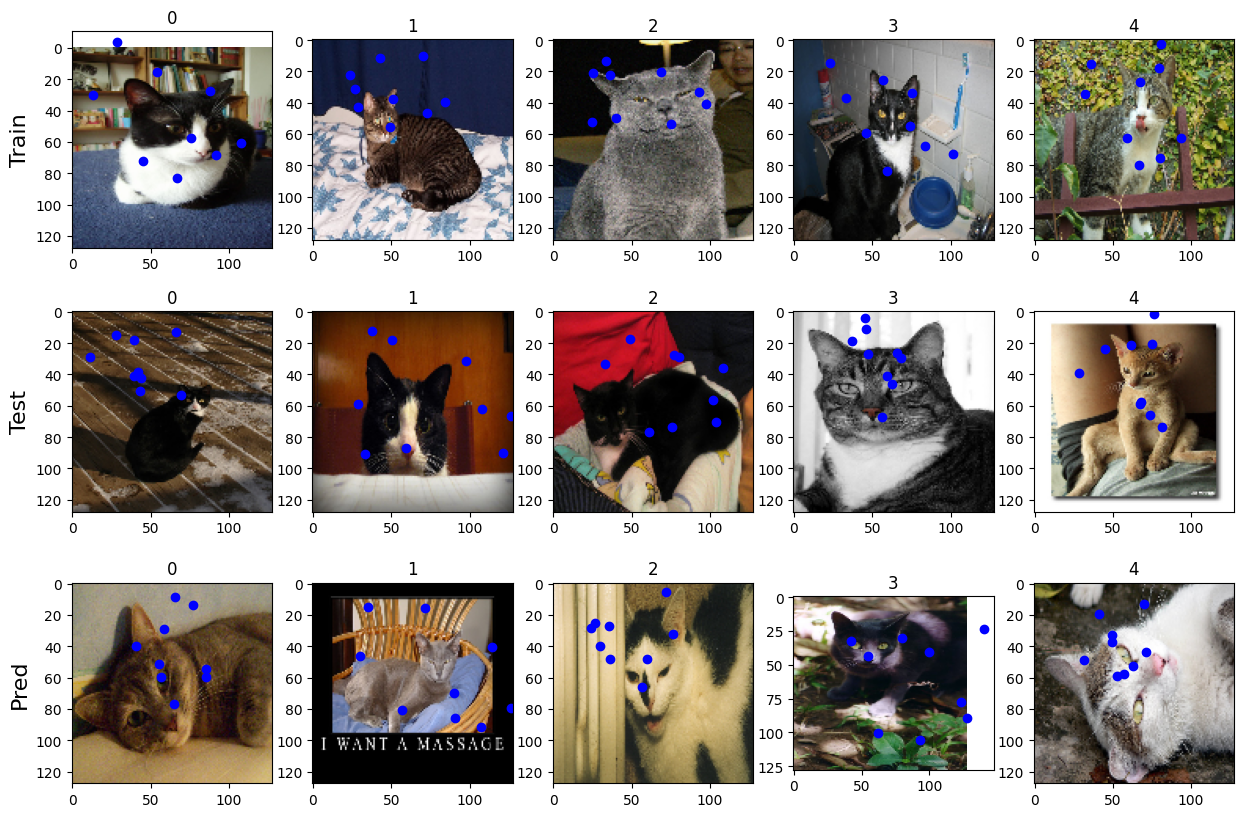

In [216]:
fig, axs = plt.subplots(nrows= 3 , ncols= 5,  figsize=(15,10))
cats_nums = range(5)
num = 0
axs[num,0].set_ylabel('Train', fontsize=16)
for i in cats_nums:
    x, y = train_dataset[i]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')
num = 1
axs[num,0].set_ylabel('Test', fontsize=16)
for i in cats_nums:
    x, y = test_dataset[i]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')
num = 2
axs[num,0].set_ylabel('Pred', fontsize=16)
for i in cats_nums:
    x = result_dataset[i][0]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')

In [217]:
pred = []
for x in result_dataloader_1:
    preds = model.forward(x[0])
    pred.append(preds[0].tolist())
predSizesNames = pd.read_csv('datasets/predictSizez&names.csv')

In [218]:
columns = pd.read_csv('train_labels.csv').columns
result = pd.DataFrame(columns=columns)

In [219]:
for row in range(len(pred)):
    width = predSizesNames.loc[row,'0']
    height = predSizesNames.loc[row,'0']
    for i in range(0, len(pred[row]),2):
            pred[row][i] = pred[row][i]*(width/size)
            pred[row][i+1] = pred[row][i+1]*(height/size)

In [220]:
for row in range(len(pred)):
    result.loc[-1] = pred[row]+[predSizesNames.loc[row,'2']]
    result.index = result.index + 1
    result = result.sort_index()

In [221]:
result = result.rename(columns={"file_name":"file_names"})

In [222]:
result.to_csv('results/result.csv',index=False)